# Multiclass classification using a perceptron

The Softmax function is also known as the normalized exponential function. It normalizes the input into a probability distribution that sums to 1.

In [ ]:
raise SystemExit("Stop right there!");

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# System
import os

# Mathematical operations and data manipulation
import pandas as pd
from pandas import get_dummies

# Modelling
import tensorflow as tf

# Statistics
from sklearn.metrics import accuracy_score

# Plotting
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

<a id="set-paths"></a>
## Set paths

In [3]:
# Path to datasets directory
data_path = "./datasets"
# Path to assets directory (for saving results to)
assets_path = "./assets"

<a id="loading-data"></a>
## Loading dataset

In [4]:
dataset = pd.read_csv(f"{data_path}/iris.csv")

In [5]:
dataset.head()

petallength  petalwidth  sepallength  sepalwidth  species
0          5.1         3.5          1.4         0.2        0
1          4.9         3.0          1.4         0.2        0
2          4.7         3.2          1.3         0.2        0
3          4.6         3.1          1.5         0.2        0
4          5.0         3.6          1.4         0.2        0

<a id="exploring-data"></a>
## Exploring dataset

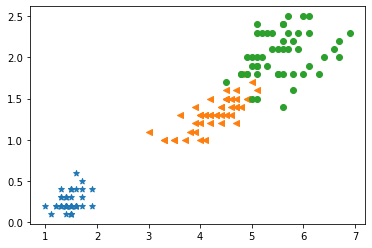

In [6]:
plt.scatter(
    dataset[dataset["species"] == 0]["sepallength"],
    dataset[dataset["species"] == 0]["sepalwidth"],
    marker="*",
)
plt.scatter(
    dataset[dataset["species"] == 1]["sepallength"],
    dataset[dataset["species"] == 1]["sepalwidth"],
    marker="<",
)
plt.scatter(
    dataset[dataset["species"] == 2]["sepallength"],
    dataset[dataset["species"] == 2]["sepalwidth"],
    marker="o",
)

<a id="model"></a>
## Training of the network

In [7]:
# Split into features and labels. Convert values at the end into
# matrix format
x = dataset[["petallength", "petalwidth", "sepallength", "sepalwidth"]].values
y = dataset["species"].values
y = get_dummies(y)
y = y.values

In [8]:
# Creating TensorFlow variables for features and labels and
# typecasting them to float
x = tf.Variable(x, dtype=tf.float32)

In [9]:
# Training of the perceptron
Number_of_features = 4
Number_of_units = 3

# Weights and bias
weight = tf.Variable(tf.zeros([Number_of_features, Number_of_units]))
bias = tf.Variable(tf.zeros([Number_of_units]))

# Optimizer
optimizer = tf.optimizers.Adam(0.01)

In [10]:
def perceptron(x):
    z = tf.add(tf.matmul(x, weight), bias)
    output = tf.nn.softmax(z)
    return output


def train(i):
    for n in range(i):
        loss = lambda: abs(
            tf.reduce_mean(
                tf.nn.softmax_cross_entropy_with_logits(
                    labels=y, logits=perceptron(x)
                )
            )
        )
        optimizer.minimize(loss, [weight, bias])


# Train the network
train(1000)

<a id="statistics"></a>
## Statistics

In [11]:
tf.print(weight)

[[0.684310615 0.895632923 -1.01323473]
 [2.64246488 -1.13437688 -3.20665288]
 [-2.96634197 -0.129377589 3.2572844]
 [-2.97383857 -3.13501596 3.23136568]]


In [12]:
tf.print(bias)

[2.72811317 5.23916721 -3.98247242]


In [13]:
# Passing the input data to check whether the perceptron
# classifies it correctly
ypred = perceptron(x)
# Rounding off the output to convert it into binary format
ypred = tf.round(ypred)

In [14]:
# Measuring the accuracy
acc = accuracy_score(y, ypred)
print(acc)

0.98
